# Analyses MooneyTD task in ASD (adolescents)

##### Researchers: Sander Van de Cruys, Ines Van de Put (MA thesis student), Steven Vanmarcke (data collection), Johan Wagemans
___


Notes:
* All errorbars are **95% CIs**
* 25 participants in each group (adolescents, matched on IQ and gender by Steven)
* Task order: Mooney (pretest, exposure phase, posttest; "MooneyTD"), learning uncertain environment


* 1s target duration
* 2s template duration
* 750ms iti


Mooney task based on: 

> Teufel, C., Subramaniam, N., Dobler, V., Perez, J., Finnemann, J., Mehta, P. R., … Fletcher, P. C. (2015). Shift toward prior knowledge confers a perceptual advantage in early psychosis and psychosis-prone healthy individuals. Proceedings of the National Academy of Sciences of the United States of America, 112(43), 13401–13406.


We could add a measure of the false alarms in the Mooney task when we look only at phase 1 (pre-exposure) responses and compare the total number of guesses made with those that were accurate. It is very important then to encourage participants to guess every time they think they can recognize *some* meaningful structure (we do so in the instructions of the Mooney task). The total number of guesses (irrespective of accurate recognition) should already give some idea of their "top-down generative strength".

notes: 223 (under ados cutoff) & 204/229 (acc lower than .2)

## Table of contents


* [Preprocessing](#Preprocessing-mooneyTD)



In [2]:
import numpy as np
import pandas as pd
import csv, json
from fuzzywuzzy import fuzz

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import print_function
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


%pylab inline
sns.set(style="whitegrid", color_codes=True)


Populating the interactive namespace from numpy and matplotlib


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Preprocessing mooneyTD 

**! Don't run this again, import preprocessed data below**

From raw data to dataframe

In [18]:


with open('MooneyDataRawASD.csv', 'Ur') as f:
    data = list(list(rec) for rec in csv.reader(f, delimiter='\t'))

expandata=[]

print(len(data))
expandata.append(["id", "trialnb", "blocknb", "prepost", "stim", "response", "rt"])

#print(data[1][2])


for i,row in enumerate(data):
    
    
    if i==0:
        continue
    else:
        trials=row[2].split(']')
        
        
        for trial in trials:
            
            trial = trial.strip('[]')
            if trial=="": continue
            trial = trial.split(',')            
            expandata.append(trial)

print(len(expandata))

with open("datMooneyTD.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(expandata)
    


80
9481


# Read in preprocessed data and run correction key

In [26]:

df = pd.read_csv("dataMooney-aangepast.csv",)
df.head()

,id,trialnb,blocknb,prepost,stim,response,rt
0,102,0,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,hond,5391
1,102,1,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,man,7805
2,102,2,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,vrouw,7894
3,102,3,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,hond,7165
4,102,4,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,strand,5215


In [28]:


def correct(df):


    rk = pd.read_csv("mooneyanswerkey.csv",delimiter='\t')
    acccol = []
    correctRespcol = []
    
    
    for rowNb, row in df.iterrows():


        answer = str(row['response'])
        acc=0
        
        

        if answer!='':
            answer=answer.lower()

            img= row['stim']
            
            
            img=img.split('http://www.sandervandecruys.be/onlineExp/mooneyTD/')
        
            img=img[1].strip('"')
            
            sols= rk.sol[rk['tt'] == img]
            sols=np.array(sols)[0].split(',')
            correctResp=sols

            for i in sols:
                i.strip()
                if fuzz.ratio(i,answer) > 70:
                    acc=1
                    break

        acccol.append(acc)
        correctRespcol.append(correctResp)

    df['acc'] = acccol
    df['correctResp'] = correctRespcol
    #print acccol
    return df

df = correct(df)
df.head()
df.to_csv('dataMooneyTDwithAcc.csv')




# Import & check data

In [3]:
df= pd.read_csv('dataMooneyTDwithAcc.csv')

df.head()

,Unnamed: 0,id,trialnb,blocknb,prepost,stim,response,rt,acc,correctResp
0,0,102,0,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,hond,5391,0,"['kikker', ' pad', ' toad', ' frog']"
1,1,102,1,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,man,7805,0,"['hagedis', ' kameleon', ' leguaan', ' lizard'..."
2,2,102,2,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,vrouw,7894,0,"['uil', ' owl', ' vogel', ' bird']"
3,3,102,3,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,hond,7165,0,"['luipaard', ' jachtluipaard', ' jaguar', ' le..."
4,4,102,4,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,strand,5215,0,"['kangoeroe', ' kangaroo']"


# Merge descriptive data with experimental data

In [4]:
dfDescriptive = pd.read_excel("DescriptiveData.xls")

#df.id = df["id"].str.strip("\"")
#df.id = df["id"].astype(int)

dfmerged= pd.merge(df, dfDescriptive, on='id')

print(len(dfmerged['id'].unique()))
print(len(dfmerged))


dfmerged.to_csv('dataMooneywithDescriptive.csv')

df= dfmerged


df.head()



49
5880


,Unnamed: 0,id,trialnb,blocknb,prepost,stim,response,rt,acc,correctResp,...,TIQ,VIQ,PIQ,SRS_overall,SRS_consciousness,SRS_Cognition,SRS_Communication,SRS_Motivation,SRS_Preoccupation,ADOS: Above cut-off?
0,0,102,0,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,hond,5391,0,"['kikker', ' pad', ' toad', ' frog']",...,107,97,117,37,37,41,37,38,45,NaN
1,1,102,1,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,man,7805,0,"['hagedis', ' kameleon', ' leguaan', ' lizard'...",...,107,97,117,37,37,41,37,38,45,NaN
2,2,102,2,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,vrouw,7894,0,"['uil', ' owl', ' vogel', ' bird']",...,107,97,117,37,37,41,37,38,45,NaN
3,3,102,3,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,hond,7165,0,"['luipaard', ' jachtluipaard', ' jaguar', ' le...",...,107,97,117,37,37,41,37,38,45,NaN
4,4,102,4,0,pre,http://www.sandervandecruys.be/onlineExp/moone...,strand,5215,0,"['kangoeroe', ' kangaroo']",...,107,97,117,37,37,41,37,38,45,NaN


# Explore data: should we exclude people?

In [114]:
for i, v in enumerate(df.columns):
    print(i, v)
print(df.dtypes)

0 Unnamed: 0
1 id
2 trialnb
3 blocknb
4 prepost
5 stim
6 response
7 rt
8 acc
9 correctResp
10 Initials
11 Age
12 Gender
13 Handedness
14 Group
15 TIQ
16 VIQ
17 PIQ
18 SRS_overall
19 SRS_consciousness
20 SRS_Cognition
21 SRS_Communication
22 SRS_Motivation
23 SRS_Preoccupation
24 ADOS: Above cut-off?
Unnamed: 0                int64
id                        int64
trialnb                   int64
blocknb                   int64
prepost                  object
stim                     object
response                 object
rt                      float64
acc                       int64
correctResp              object
Initials                 object
Age                       int64
Gender                   object
Handedness               object
Group                    object
TIQ                     float64
VIQ                       int64
PIQ                       int64
SRS_overall               int64
SRS_consciousness         int64
SRS_Cognition             int64
SRS_Communication         i

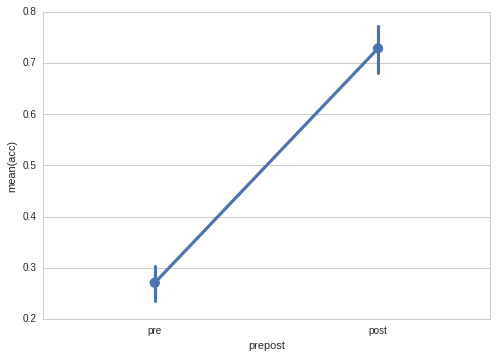

In [20]:
sns.pointplot(x="prepost", y="acc",units="id",data=df);

In [5]:
idmeans= df.groupby('id').acc.mean()
idmeans[idmeans<.2]

id
204    0.108333
229    0.100000
Name: acc, dtype: float64

**Participant 204 and 229 did not reach .2 accuracy and will be excluded from the rest of the analyses**

In [7]:
df= df.loc[df.id!=204]
df= df.loc[df.id!=229]



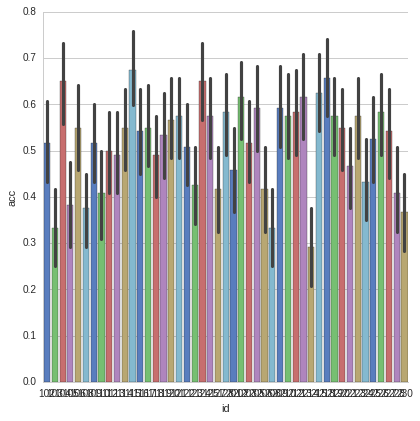

In [30]:
sns.factorplot(x="id", y="acc", data=df, size=6, kind="bar", palette="muted")

# Does performance (pre, post acc) depend on group or block?

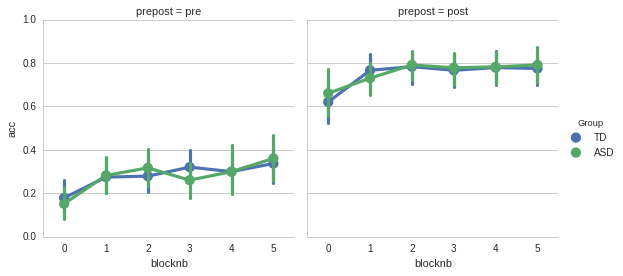

In [12]:

sns.factorplot(x="blocknb", y="acc",hue='Group', col='prepost', units="id",data=df);
#sns.pointplot(x="blocknb", y="acc",hue="prepost", units="id",data=df[df.Group=='TD']);

In [27]:
model = smf.glm(formula="acc ~ Group*prepost*blocknb", data=df,  family=sm.families.Binomial())
results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    acc   No. Observations:                 5640
Model:                            GLM   Df Residuals:                     5632
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -3225.2
Date:                Thu, 14 Jul 2016   Deviance:                       6450.5
Time:                        18:52:09   Pearson chi2:                 5.64e+03
No. Iterations:                     6                                         
                                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------
Intercept                              0.8311      0.106      7.806      0.000     

In [28]:
# model formulation
fml = "acc ~ prepost * Group + SRS_overall + PIQ"


# covariance structure
ex = sm.cov_struct.Exchangeable()
#link fu
fa = sm.families.Binomial(sm.families.links.logit)

model = sm.GEE.from_formula(fml, "id", df, cov_struct=ex, family=fa)
result = model.fit()



print(result.summary())
print(result.cov_struct.summary())

                               GEE Regression Results                              
Dep. Variable:                         acc   No. Observations:                 5640
Model:                                 GEE   No. clusters:                       47
Method:                        Generalized   Min. cluster size:                 120
                      Estimating Equations   Max. cluster size:                 120
Family:                           Binomial   Mean cluster size:               120.0
Dependence structure:         Exchangeable   Num. iterations:                    12
Date:                     Thu, 14 Jul 2016   Scale:                           1.002
Covariance type:                    robust   Time:                         18:53:18
                                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------------
Intercept                     -0.4924      0.750     -

In [112]:
# odds ratio: http://stats.stackexchange.com/questions/133623/help-me-understand-adjusted-odds-ratio-in-logistic-regression
oddsratio = 1- (1/(1+np.exp(-2.088)))
oddsratio

0.11026864040567408

## Interim conclusion

* There is a clear effect of the exposure to the "templates".
* There is also a clear learning effect (blocknb)
* There is no significant group effect or group*phase interaction.
* These conclusions hold also when correcting for IQ (matched) and SRS scores. IQ (specifically PIQ) seems to modulate the effect (see below).
* The use of prior (top-down) information is not reduced or increased in ASD.

# Compute diff scores (postmean minus premean)

In [16]:

print(len(df['id'].unique()))


def diffScore(df):
    
    after = df[df.prepost=='post'].acc.mean()
    before = df[df.prepost=='pre'].acc.mean()
    countsPre= df[df.prepost=='pre'].response.count()
    countsPost= df[df.prepost=='post'].response.count()
    fa= (df[df.prepost=='pre'].acc.sum())/float(countsPre)
    
    diff= after - before 
    
    SRS_overall = df.SRS_overall.mean()
    PIQ = df.PIQ.mean()
    TIQ = df.TIQ.mean()    
    group = df['Group'].iloc[0]
    
    
    #df['id'].iloc[0]
    dfout = pd.DataFrame(data=[(group, PIQ, TIQ, SRS_overall, before, after, diff, countsPre, countsPost, fa)], \
                         columns=['group','PIQ', 'TIQ','SRS_overall','before', 'after', 'diff', \
                                  'countsPre', 'countsPost', 'fa'])
    
    return dfout

dfdiff = df.groupby('id').apply(diffScore)

dfdiff = dfdiff.reset_index()

dfdiff.head()



47


,id,level_1,group,PIQ,TIQ,SRS_overall,before,after,diff,countsPre,countsPost,fa
0,102,0,TD,117,107.0,37,0.283333,0.750000,0.466667,60,60,0.283333
1,103,0,TD,114,111.5,48,0.200000,0.466667,0.266667,60,60,0.200000
2,104,0,TD,123,115.5,56,0.400000,0.900000,0.500000,49,58,0.489796
3,105,0,TD,103,107.0,45,0.116667,0.650000,0.533333,52,59,0.134615
4,106,0,TD,100,101.5,49,0.233333,0.866667,0.633333,58,60,0.241379


# Statistical test on the diff scores and on counts

In [139]:
# GLM test

model = smf.glm(formula="diff ~ group * SRS_overall * PIQ", data=dfdiff)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   diff   No. Observations:                   47
Model:                            GLM   Df Residuals:                       39
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                0.00966927690589
Method:                          IRLS   Log-Likelihood:                 46.707
Date:                Thu, 14 Jul 2016   Deviance:                      0.37710
Time:                        03:01:48   Pearson chi2:                    0.377
No. Iterations:                     4                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                      -0.2147      1.795     -0.120      0.905        -3.733     3.304
g

In [18]:
# GLM test of counts

model = smf.glm(formula="countsPre ~ group * SRS_overall * PIQ", data=dfdiff)

results = model.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              countsPre   No. Observations:                   47
Model:                            GLM   Df Residuals:                       39
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                   178.752309283
Method:                          IRLS   Log-Likelihood:                -184.18
Date:                Thu, 14 Jul 2016   Deviance:                       6971.3
Time:                        18:48:33   Pearson chi2:                 6.97e+03
No. Iterations:                     4                                         
                                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------
Intercept                    -249.4742    244.086     -1.022      0.307      -727.874   228.926
g

# Make nicer plots (with distributional info)

In [52]:
# reshape data

#dfdiff = dfdiff[dfdiff.postm>.2]
dfmelted = pd.melt(dfdiff, id_vars=['id','group'], value_vars=['before', 'after'], var_name=["prepost"], value_name='acc')
dfmelted.head()


,id,group,prepost,acc
0,102,TD,before,0.283333
1,103,TD,before,0.200000
2,104,TD,before,0.400000
3,105,TD,before,0.116667
4,106,TD,before,0.233333


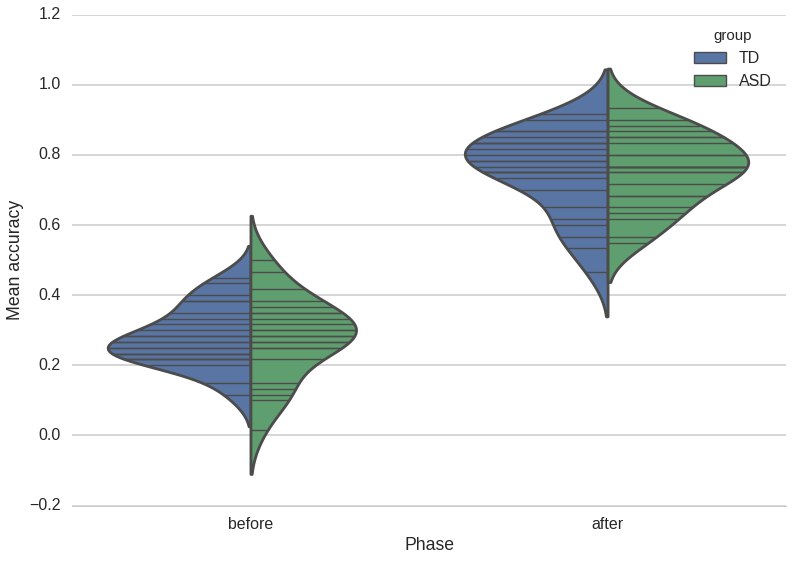

In [91]:
sns.set_context("poster")
#sns.swarmplot(x="prepost", y="acc", hue="group", data=dfmelted, palette="dark")
sns.violinplot(x="prepost", y="acc", hue="group", data=dfmelted, split=True, inner="stick");
sns.axlabel("Phase", "Mean accuracy")
sns.despine(left=True)

## Interim conclusion

* Distributions seems similar enough.


# Check correlations with SRS

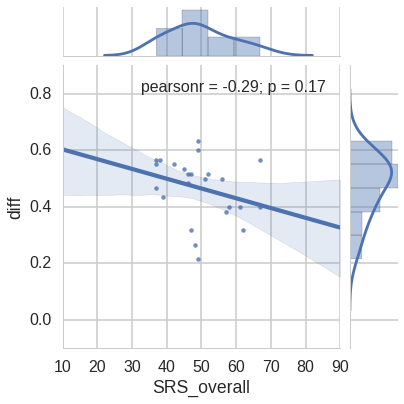

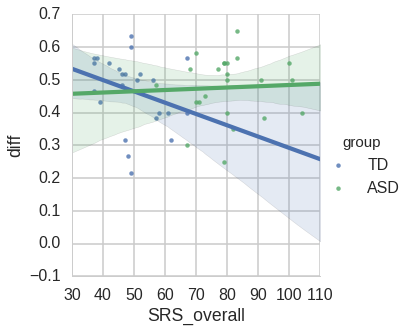

In [132]:
sns.jointplot(x="SRS_overall", y="diff", data=dfdiff[dfdiff.group=='TD'], kind="reg");
sns.lmplot(x="SRS_overall", y="diff", hue='group', data=dfdiff);

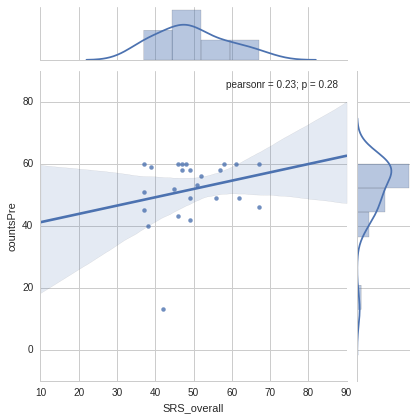

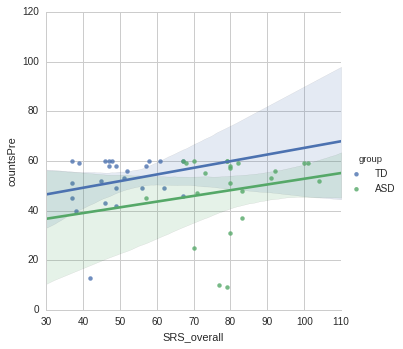

In [22]:
sns.jointplot(x="SRS_overall", y="countsPre", data=dfdiff[dfdiff.group=='TD'], kind="reg");
sns.lmplot(x="SRS_overall", y="countsPre", hue='group', data=dfdiff);

## Interim conclusion

* No notable correlations between SRS_overall & diff, premean, counts 

# Check correlations with IQ

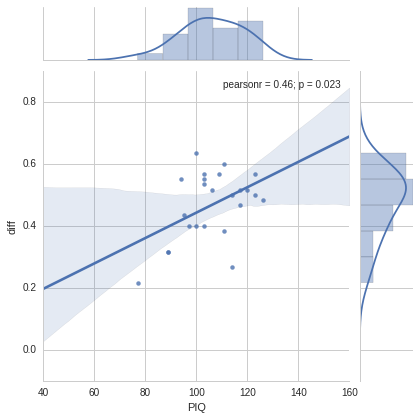

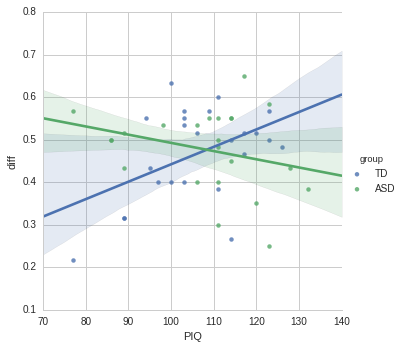

In [24]:
sns.jointplot(x="PIQ", y="diff", data=dfdiff[dfdiff.group=='TD'], kind="reg");
sns.lmplot(x="PIQ", y="diff", hue='group', data=dfdiff);


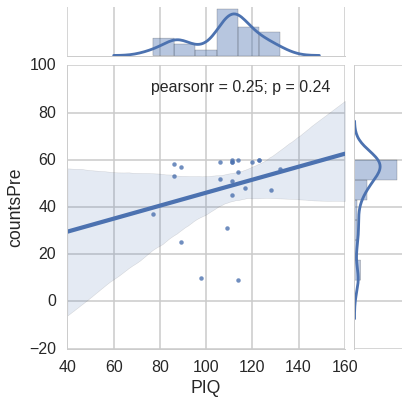

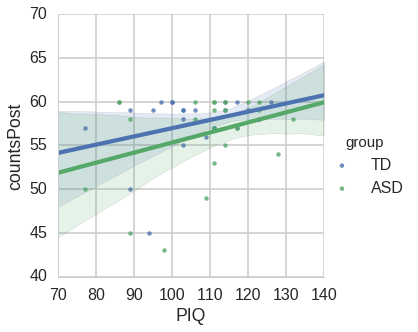

In [135]:
sns.jointplot(x="PIQ", y="countsPre", data=dfdiff[dfdiff.group=='ASD'], kind="reg");
sns.lmplot(x="PIQ", y="countsPost", hue='group', data=dfdiff);

## Interim conclusion

* No notable correlations with IQ in premean or counts
* There might be a positive correlation between diff (not in before acc) and PIQ, but not in ASD group (or not enough spread in PIQ). This will likely not survive multiple comparison correction.

# TODO

*  
